Import `Seaborn, Matplotlib, pandas, and sklearn`

In [1]:
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Load the csv file into the dataframe and check the first five rows

In [2]:
df = pd.read_csv('Population-Cases.csv')
df.head()

,county_name,cases,population,case rate,14 day case rate,land area,Pop. Density
0,Appling,1230,18561,6626.80,177.79,512.557983,36.212488
1,Atkinson,521,8330,6254.50,276.11,344.592011,24.173515
2,Bacon,663,11404,5813.75,105.23,285.950989,22.249190
3,Baker,105,3116,3369.70,64.18,349.074005,8.926474
4,Baldwin,2496,44428,5618.08,202.57,267.404999,166.144987


Get a Count of the number of rows in the table

In [3]:
df.shape

(159, 7)

Get a Statistical Summary of our data

In [4]:
df.describe()

,cases,population,case rate,14 day case rate,land area,Pop. Density
count,159.000000,1.590000e+02,159.000000,159.000000,159.000000,159.000000
mean,2488.553459,6.813504e+04,4031.104528,262.941132,373.814049,200.205414
std,5172.879194,1.500324e+05,1688.373162,162.432543,158.499128,385.643998
min,36.000000,1.632000e+03,1551.590000,14.810000,121.027000,8.075465
25%,480.500000,1.171900e+04,3142.255000,150.425000,256.752502,31.864047
50%,915.000000,2.266400e+04,3698.330000,238.600000,346.657013,68.882796
75%,2219.000000,5.598650e+04,4779.345000,333.325000,459.025497,153.814378
max,36793.000000,1.099181e+06,18150.530000,1058.100000,908.424988,2295.151888


Check for Null

In [5]:
df.isnull().values.any()

False

Since we're only checking **Pop.Density** against **Cases**, we only need those two, so we can drop the rest

In [6]:
df = df[["cases", "Pop. Density"]]


Get a Statistical Summary of our remaining data

In [7]:
df.describe()

,cases,Pop. Density
count,159.000000,159.000000
mean,2488.553459,200.205414
std,5172.879194,385.643998
min,36.000000,8.075465
25%,480.500000,31.864047
50%,915.000000,68.882796
75%,2219.000000,153.814378
max,36793.000000,2295.151888


Set y to be the cases in each county and the x to be the population density

In [8]:
y = df["cases"].values
x = np.array(df["Pop. Density"].values).reshape((-1,1))

Use sklearn's `Linear Regression` estimator to get a best-fit line for the graph and graph it

Text(0.5, 1.0, 'Cases vs Population Density')

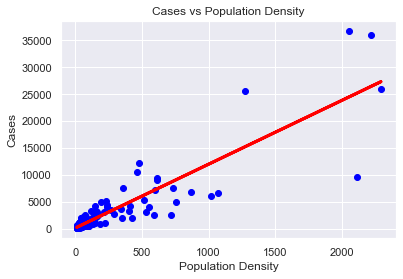

In [9]:
model = LinearRegression().fit(x,y)
plt.scatter(x,y, color="blue")
plt.plot(x,model.predict(x),color="red",linewidth=3)
plt.xlabel("Population Density")
plt.ylabel("Cases")
plt.title("Cases vs Population Density")

Since there are a few counties which have a higher population density, we make another graph that limit the max value of x to get a closer look at the fit-line near the x-axis. This does not mess up our data as we are only limiting the max value that x can take. To increase the decrease or increae the x-range, one can change the `plt.xlim()` numbers. One can do the same to the `plt.ylim()` numbers

In [ ]:
plt.xlim(-20,400)
plt.ylim(-500,10000)
plt.scatter(x,y, color="blue")
plt.plot(x,model.predict(x),color="red",linewidth=3)
plt.xlabel("Population Density")
plt.ylabel("Cases")
plt.title("Cases vs Population Density")

Get the $R^{2}$ value,the coefficient of determination, to judge the adequacy of a regression mode (the higher the better). We also get the Intercept, $b_{0}$, and the coefficient, $b_{1}$

In [ ]:
r_sq = model.score(x,y)
print("Coefficient of Determination: ",r_sq)
print("Intercept: ", model.intercept_)
print("Slope: ", model.coef_)

r_sq = model.score(x,y)
print("Coefficient of Determination: ",r_sq)
print("Intercept: ", model.intercept_)
print("Slope: ", model.coef_)

Text(0.5, 1.0, 'Cases vs Population Density')

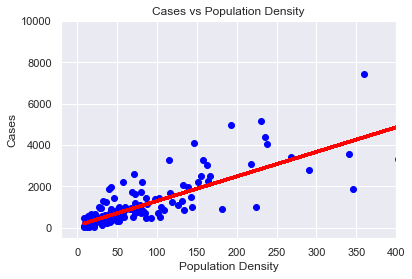

In [10]:
plt.xlim(-20,400)
plt.ylim(-500,10000)
plt.scatter(x,y, color="blue")
plt.plot(x,model.predict(x),color="red",linewidth=3)
plt.xlabel("Population Density")
plt.ylabel("Cases")
plt.title("Cases vs Population Density")

Get the $R^{2}$ value,the coefficient of determination, to judge the adequacy of a regression mode (the higher the better). We also get the Intercept, $b_{0}$, and the coefficient, $b_{1}$

In [11]:
r_sq = model.score(x,y)
print("Coefficient of Determination: ",r_sq)
print("Intercept: ", model.intercept_)
print("Slope: ", model.coef_)

Coefficient of Determination:  0.7804090603966796
Intercept:  116.18179425255812
Slope:  [11.84968787]
